# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [28]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
!pip install pingouin
import pingouin as pg

%matplotlib inline




# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:
fifa['ValueNumeric']= fifa['Value'].str.extract(r'(\d+.?\d+)').astype(float)


In [5]:
fifa['ValueNumeric']

0        110.5
1         77.0
2        118.5
3         72.0
4        102.0
         ...  
18202     60.0
18203     60.0
18204     60.0
18205     60.0
18206     60.0
Name: ValueNumeric, Length: 18207, dtype: float64

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [6]:
fifa.rename(columns={'Preferred Foot':'PreferredFoot'},inplace=True)

In [7]:
fifa

,Name,Age,Nationality,Overall,Potential,Club,Value,PreferredFoot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,Right,CM,2.0,...,57.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,60.0
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,Right,ST,2.0,...,39.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,60.0
18204,B. Worman,16,England,47,67,Cambridge United,€60K,Right,ST,3.0,...,69.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,60.0
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,Right,RW,3.0,...,60.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,60.0


In [8]:
moore_lm = ols('ValueNumeric ~ C(PreferredFoot, Sum)*C(Position, Sum)',data=fifa).fit()

In [9]:
table = sm.stats.anova_lm(moore_lm, typ=2) 
table

,sum_sq,df,F,PR(>F)
"C(PreferredFoot, Sum)",1.457462e+05,1.0,1.725739,1.889741e-01
"C(Position, Sum)",8.506502e+06,26.0,3.873963,1.063352e-10
"C(PreferredFoot, Sum):C(Position, Sum)",2.909697e+06,26.0,1.325111,1.242524e-01
Residual,1.400254e+09,16580.0,NaN,NaN


What is your conclusion from this ANOVA?

In [6]:
# El valor de p_value es menor a 0.05 en los dos casos , podemos decir que si hay una prefencia entre el el pie preferido 
#del jugador con la posición en la que jjuega y la cantidad de dinero 



After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [10]:
moore_lm = ols(' ValueNumeric~Nationality',data=fifa).fit()


In [11]:
table2 = sm.stats.anova_lm(moore_lm, typ=2) 
table2

/Users/katiahernandez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 163, but rank is 162
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
Nationality,3.037007e+07,163.0,2.225754,6.889865e-17
Residual,1.382817e+09,16519.0,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
#p-value es menor que 0.05, podemos rechazar la hipótesis nula. 
#Parece haber una distinción entres la nacionalidad y la cantidad de dinero 

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [12]:
# Your code here:

fifa.isnull().sum()

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
PreferredFoot      48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
ValueNumeric     1525
dtype: int64

In [13]:
fifa2=fifa.dropna()

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [14]:
fifa2

,Name,Age,Nationality,Overall,Potential,Club,Value,PreferredFoot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,Right,CM,2.0,...,57.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,60.0
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,Right,ST,2.0,...,39.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,60.0
18204,B. Worman,16,England,47,67,Cambridge United,€60K,Right,ST,3.0,...,69.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,60.0
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,Right,RW,3.0,...,60.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,60.0


In [16]:
fifa.dtypes

Name              object
Age                int64
Nationality       object
Overall            int64
Potential          int64
Club              object
Value             object
PreferredFoot     object
Position          object
Weak Foot        float64
Acceleration     float64
SprintSpeed      float64
Stamina          float64
Strength         float64
LongShots        float64
Aggression       float64
Interceptions    float64
Positioning      float64
Vision           float64
Penalties        float64
ValueNumeric     float64
dtype: object

In [20]:
newdata=fifa2['SprintSpeed']#,'ValueNumeric','Acceleration','SprintSpeed','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties']]

In [22]:
# Asignamos variables independientes (X) y la dependiente (Y)
#newdata=vehicles.loc[:, vehicles.columns != 'CO2 Emission Grams/Mile']
X = sm.add_constant(newdata)
Y = fifa2['Stamina']

# Creamos el modelo (OLS, que significa "ordinary least square", es lo mismo que una regresión lineal)
modelo = sm.OLS(Y, X)
modelo = modelo.fit()


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [23]:


modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Stamina   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                 1.046e+04
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:04:55   Log-Likelihood:                -65623.
No. Observations:               16634   AIC:                         1.312e+05
Df Residuals:                   16632   BIC:                         1.313e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          19.3349      0.436     44.358      0.000      18.481      20.189
SprintSpeed     0.6743      0.007    102.268      0.000       0.661       0.687
==============================================================================
Omnibus:                       13.865   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.867
Skew:                          -0.070   Prob(JB):                     0.000974
Kurtosis:                       3.014   Cond. No.                         297.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [24]:

newdata2=fifa2['ValueNumeric']

In [25]:
# Asignamos variables independientes (X) y la dependiente (Y)

X = sm.add_constant(newdata2)
Y = fifa2['Potential']

# Creamos el modelo (OLS, que significa "ordinary least square", es lo mismo que una regresión lineal)
modelo = sm.OLS(Y, X)
modelo = modelo.fit()



Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [26]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Potential   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     685.1
Date:                Mon, 19 Sep 2022   Prob (F-statistic):          5.01e-148
Time:                        23:10:07   Log-Likelihood:                -53470.
No. Observations:               16634   AIC:                         1.069e+05
Df Residuals:                   16632   BIC:                         1.070e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           72.1990      0.066   1098.154      0.000      72.070      72.328
ValueNumeric    -0.0042      0.000    -26.175      0.000      -0.005      -0.004
==============================================================================
Omnibus:                       72.435   Durbin-Watson:                   1.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.942
Skew:                           0.140   Prob(JB):                     3.23e-17
Kurtosis:                       3.176   Cond. No.                         577.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

In [35]:
fifa2['ValueNumeric'] = np.where(fifa2['Value'].str.findall(r'(\d+.?\d+K)'),
                                 fifa2['ValueNumeric']/1000, fifa2['ValueNumeric'])
fifa2['ValueNumeric']

/var/folders/ww/y02x51013l19p_m1qw45mrlc0000gn/T/ipykernel_3935/1423075895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa2['ValueNumeric'] = np.where(fifa2['Value'].str.findall(r'(\d+.?\d+K)'),


0        110.50
1         77.00
2        118.50
3         72.00
4        102.00
          ...  
18202      0.06
18203      0.06
18204      0.06
18205      0.06
18206      0.06
Name: ValueNumeric, Length: 16634, dtype: float64

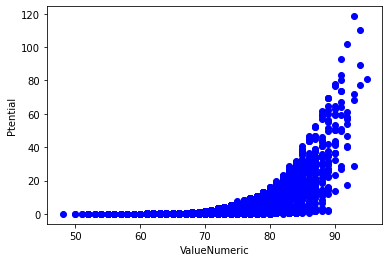

In [37]:


plt.scatter(fifa2['Potential'],fifa2['ValueNumeric'],color='b') 
plt.ylabel('Ptential')
plt.xlabel('ValueNumeric')
plt.show()

In [38]:
fifa2['ValueNumeric']

0        110.50
1         77.00
2        118.50
3         72.00
4        102.00
          ...  
18202      0.06
18203      0.06
18204      0.06
18205      0.06
18206      0.06
Name: ValueNumeric, Length: 16634, dtype: float64